In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the datasets
ev_data = pd.read_csv('indian-ev-data.csv')
buying_behavior = pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [4]:
ev_data.head(5)

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [3]:
buying_behavior.head(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [5]:
# Clean and preprocess the EV data
ev_data = ev_data.drop_duplicates()  # Remove duplicates
ev_data = ev_data.dropna()  # Remove rows with missing values

# Clean and preprocess the buying behavior data
buying_behavior = buying_behavior.dropna()  # Remove rows with missing values
buying_behavior['Total Salary'] = buying_behavior['Salary'] + buying_behavior['Wife Salary']  # Calculate total salary

In [6]:
# Analyze EV data
print(ev_data['Vehicle Type'].value_counts())  # Count of vehicle types
print(ev_data.groupby('Vehicle Type')['Price'].mean())  # Average price by vehicle type

# Analyze buying behavior data
print(buying_behavior['Age'].describe())  # Age distribution
print(buying_behavior['Total Salary'].describe())  # Income distribution

Vehicle Type
Scooter    38
Bike       11
Name: count, dtype: int64
Vehicle Type
Bike       147272.727273
Scooter    112710.526316
Name: Price, dtype: float64
count    99.000000
mean     36.313131
std       6.246054
min      26.000000
25%      31.000000
50%      36.000000
75%      41.000000
max      51.000000
Name: Age, dtype: float64
count    9.900000e+01
mean     2.270707e+06
std      1.050777e+06
min      2.000000e+05
25%      1.550000e+06
50%      2.100000e+06
75%      2.700000e+06
max      5.200000e+06
Name: Total Salary, dtype: float64


<ipython-input-13-3a74a947bc4d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, palette='viridis')


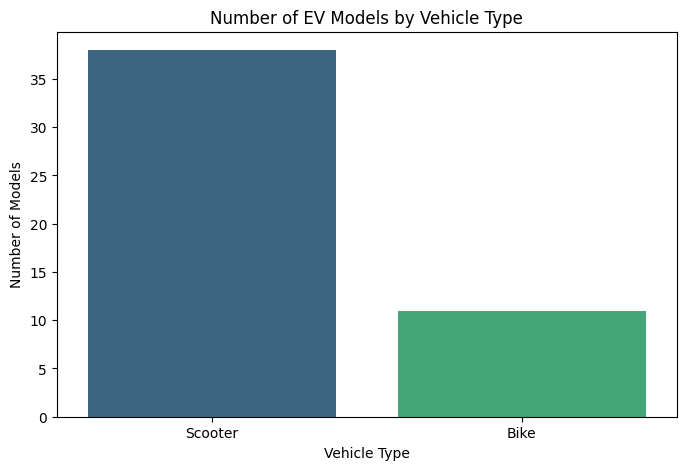

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of EV types
ev_type_counts = ev_data['Vehicle Type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=ev_type_counts.index, y=ev_type_counts.values, palette='viridis')
plt.title('Number of EV Models by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Models')
plt.show()

<ipython-input-14-37277bd93c6b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='magma')


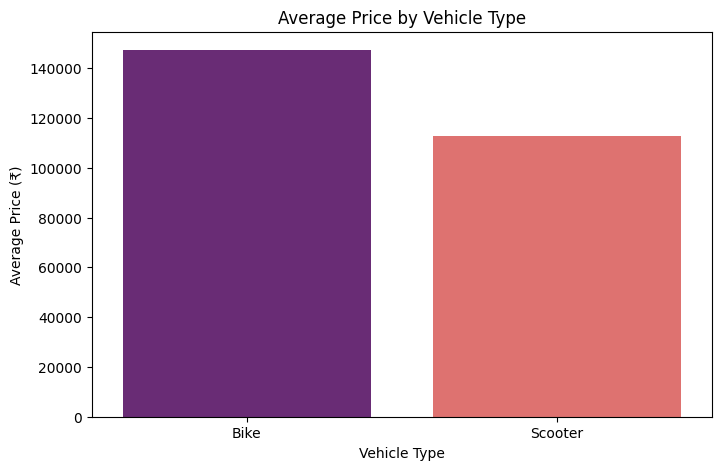

In [14]:
# Average price by vehicle type
avg_price_by_type = ev_data.groupby('Vehicle Type')['Price'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='magma')
plt.title('Average Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price (₹)')
plt.show()

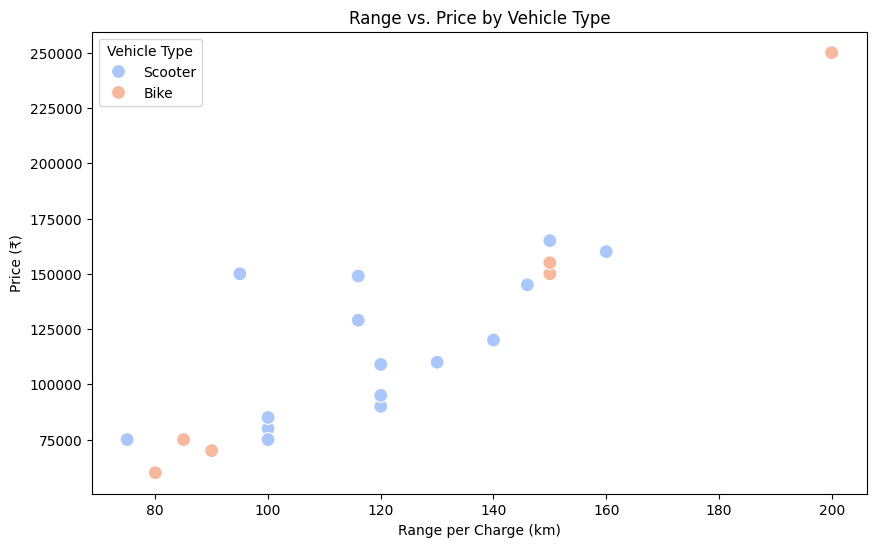

In [15]:
# Scatter plot: Range vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range per Charge (km)', y='Price', hue='Vehicle Type', data=ev_data, palette='coolwarm', s=100)
plt.title('Range vs. Price by Vehicle Type')
plt.xlabel('Range per Charge (km)')
plt.ylabel('Price (₹)')
plt.legend(title='Vehicle Type')
plt.show()

<ipython-input-16-39c01d50d749>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle Type', y='Battery Capacity (kWh)', data=ev_data, palette='Set2')


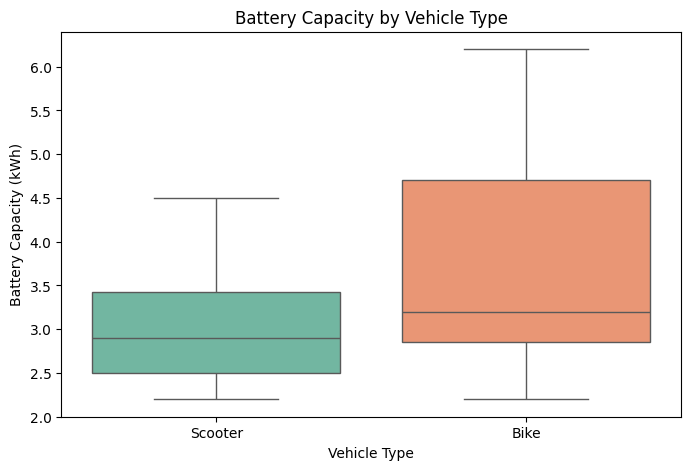

In [16]:
# Box plot: Battery Capacity by Vehicle Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Vehicle Type', y='Battery Capacity (kWh)', data=ev_data, palette='Set2')
plt.title('Battery Capacity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Battery Capacity (kWh)')
plt.show()

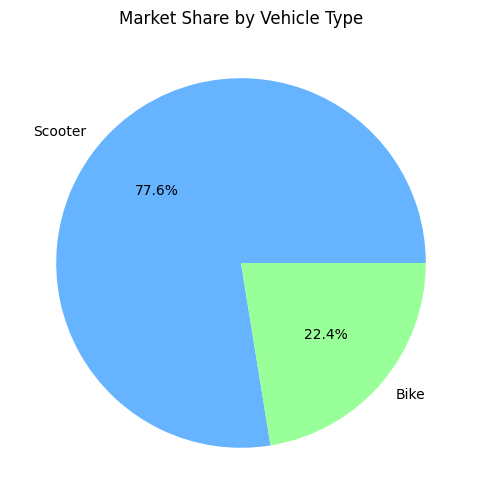

In [17]:
# Pie chart: Market share by vehicle type
plt.figure(figsize=(6, 6))
ev_data['Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Market Share by Vehicle Type')
plt.ylabel('')
plt.show()

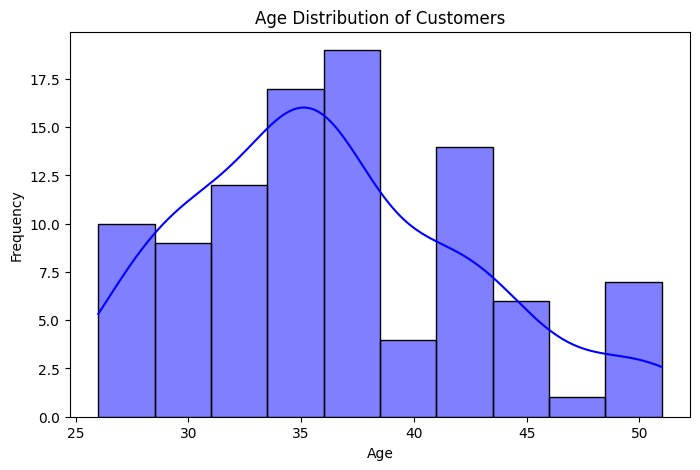

In [18]:
# Histogram: Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(buying_behavior['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

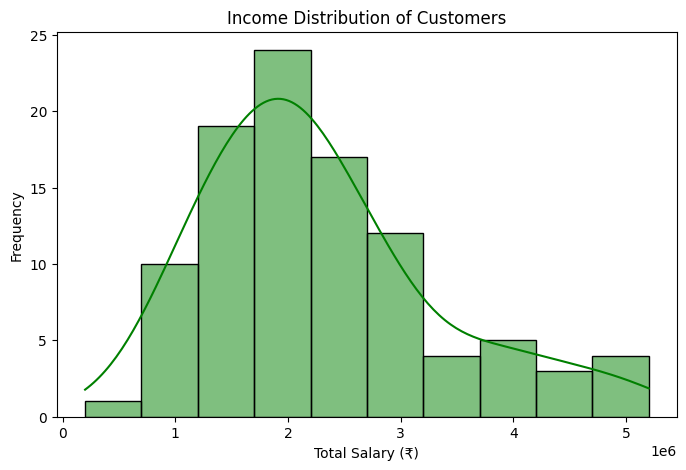

In [19]:
# Histogram: Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(buying_behavior['Total Salary'], bins=10, kde=True, color='green')
plt.title('Income Distribution of Customers')
plt.xlabel('Total Salary (₹)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-f402398360a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')


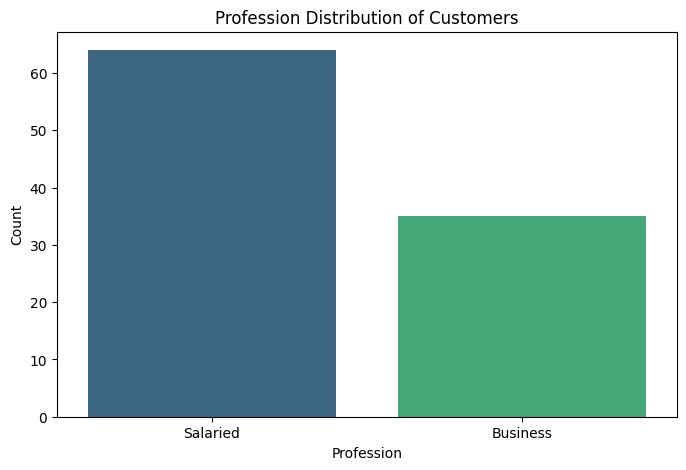

In [20]:
# Bar chart: Profession distribution
profession_counts = buying_behavior['Profession'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')
plt.title('Profession Distribution of Customers')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

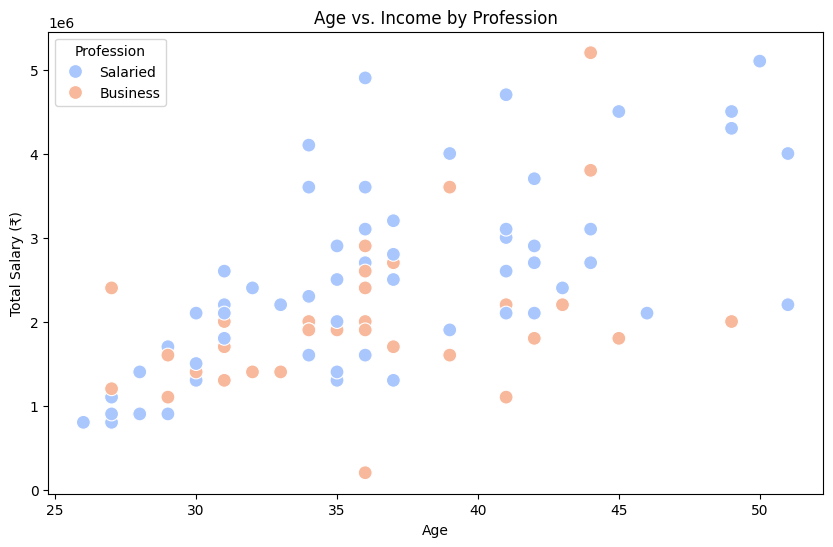

In [21]:
# Scatter plot: Age vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Salary', data=buying_behavior, hue='Profession', palette='coolwarm', s=100)
plt.title('Age vs. Income by Profession')
plt.xlabel('Age')
plt.ylabel('Total Salary (₹)')
plt.legend(title='Profession')
plt.show()

<ipython-input-22-2ef1083875f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profession', y='Total Salary', data=buying_behavior, palette='Set2')


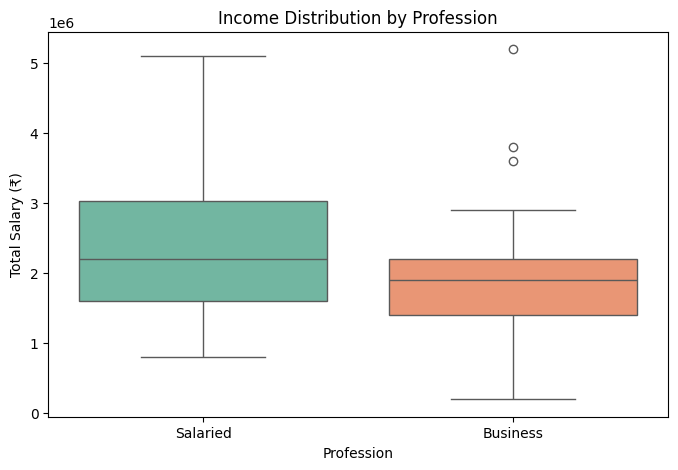

In [22]:
# Box plot: Income by profession
plt.figure(figsize=(8, 5))
sns.boxplot(x='Profession', y='Total Salary', data=buying_behavior, palette='Set2')
plt.title('Income Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Total Salary (₹)')
plt.show()

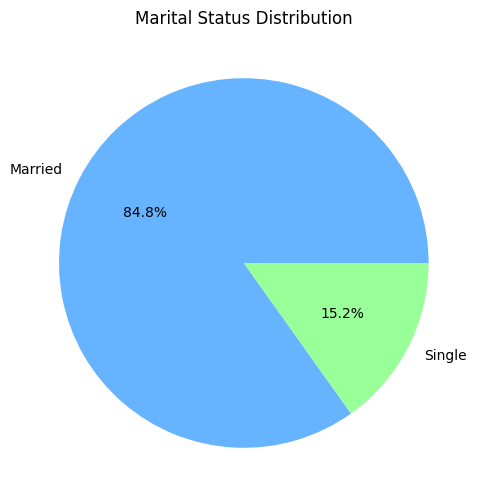

In [23]:
# Pie chart: Marital status distribution
plt.figure(figsize=(6, 6))
buying_behavior['Marrital Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

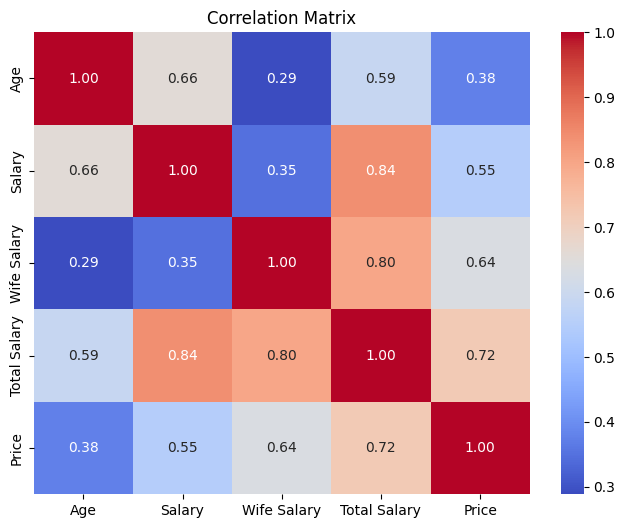

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation
numerical_columns = buying_behavior[['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']]

# Compute correlation matrix
corr_matrix = numerical_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Select relevant features for clustering
features = buying_behavior[['Age', 'Total Salary']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
buying_behavior['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clusters
cluster_summary = buying_behavior.groupby('Cluster')[['Age', 'Total Salary']].mean()
print(cluster_summary)

               Age  Total Salary
Cluster                         
0        29.517241  1.382759e+06
1        43.115385  3.569231e+06
2        36.772727  2.088636e+06


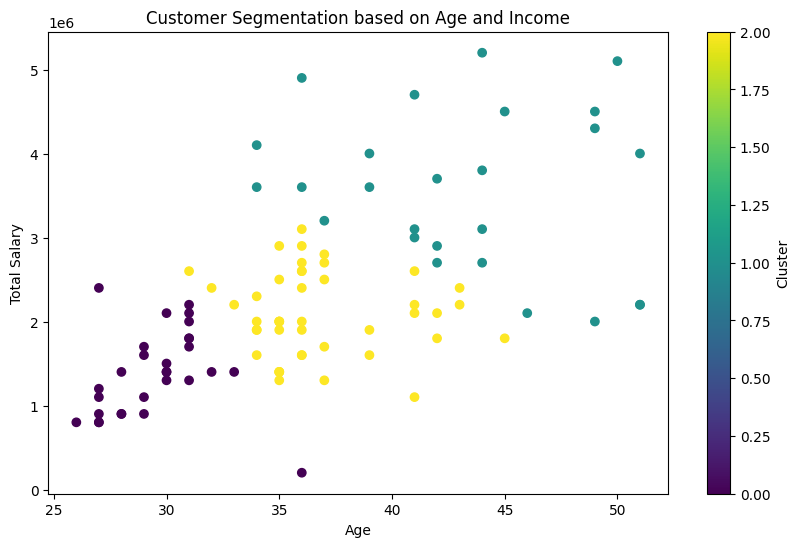

In [9]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(buying_behavior['Age'], buying_behavior['Total Salary'], c=buying_behavior['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
# Analyze the clusters
cluster_summary = buying_behavior.groupby('Cluster')[['Age', 'Total Salary']].mean()
print(cluster_summary)

# Insights
print("Cluster 0: Young, Middle-Income Individuals")
print("Cluster 1: Middle-Aged, High-Income Individuals")
print("Cluster 2: Older, High-Income Individuals")

               Age  Total Salary
Cluster                         
0        29.517241  1.382759e+06
1        43.115385  3.569231e+06
2        36.772727  2.088636e+06
Cluster 0: Young, Middle-Income Individuals
Cluster 1: Middle-Aged, High-Income Individuals
Cluster 2: Older, High-Income Individuals


In [12]:
# Estimate market size
average_ev_price = ev_data['Price'].mean()
estimated_buyers = 1000000  # 1 million buyers
market_size = average_ev_price * estimated_buyers

print(f"Estimated Market Size: ₹{market_size:,.2f}")

Estimated Market Size: ₹120,469,387,755.10


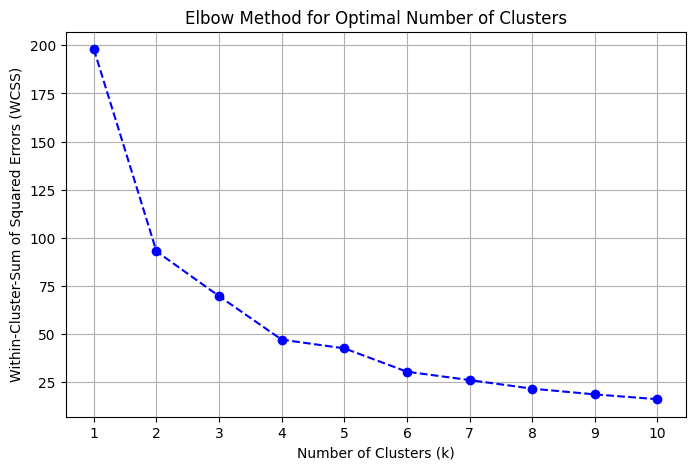

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = buying_behavior[['Age', 'Total Salary']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize list to store WCSS values
wcss = []

# Test different values of k (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [25]:
# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
buying_behavior['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clusters
cluster_summary = buying_behavior.groupby('Cluster')[['Age', 'Total Salary']].mean()
print(cluster_summary)

               Age  Total Salary
Cluster                         
0        29.517241  1.382759e+06
1        43.115385  3.569231e+06
2        36.772727  2.088636e+06


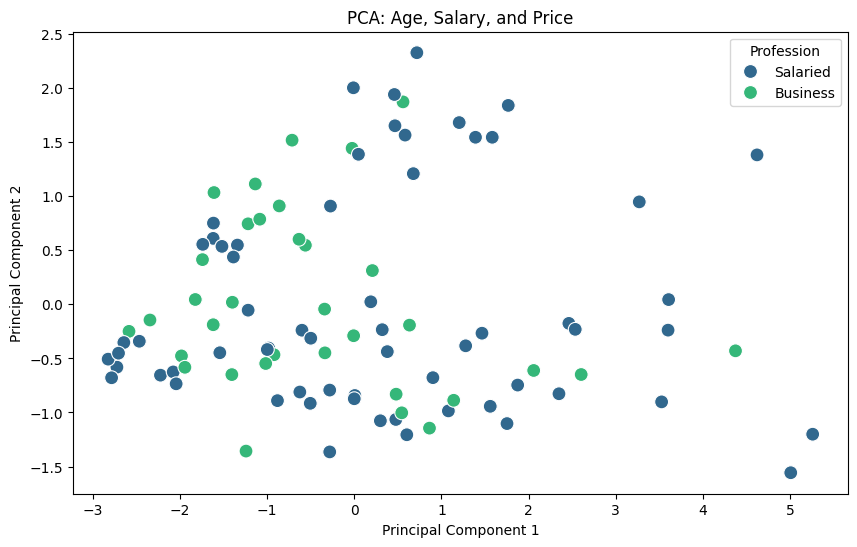

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = buying_behavior[['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(features_scaled)

# Add PCA results to the dataframe
buying_behavior['PCA1'] = pca_result[:, 0]
buying_behavior['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=buying_behavior, hue='Profession', palette='viridis', s=100)
plt.title('PCA: Age, Salary, and Price')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Profession')
plt.show()